In [ ]:
!unzip "/content/Trees in Satellite Imagery.zip" -d "/content/Trees_in_Satellite_Imagery"


Streaming output truncated to the last 5000 lines.
  inflating: /content/Trees_in_Satellite_Imagery/Trees in Satellite Imagery/Trees/Forest_1179.jpg  
  inflating: /content/Trees_in_Satellite_Imagery/Trees in Satellite Imagery/Trees/Forest_118.jpg  
  inflating: /content/Trees_in_Satellite_Imagery/Trees in Satellite Imagery/Trees/Forest_1180.jpg  
  inflating: /content/Trees_in_Satellite_Imagery/Trees in Satellite Imagery/Trees/Forest_1181.jpg  
  inflating: /content/Trees_in_Satellite_Imagery/Trees in Satellite Imagery/Trees/Forest_1182.jpg  
  inflating: /content/Trees_in_Satellite_Imagery/Trees in Satellite Imagery/Trees/Forest_1183.jpg  
  inflating: /content/Trees_in_Satellite_Imagery/Trees in Satellite Imagery/Trees/Forest_1184.jpg  
  inflating: /content/Trees_in_Satellite_Imagery/Trees in Satellite Imagery/Trees/Forest_1185.jpg  
  inflating: /content/Trees_in_Satellite_Imagery/Trees in Satellite Imagery/Trees/Forest_1186.jpg  
  inflating: /content/Trees_in_Satellite_Imagery/T

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import image_dataset_from_directory


In [ ]:
DATADIR = "/content/Trees_in_Satellite_Imagery/Trees in Satellite Imagery"
img_height = 64
img_width = 64
batch_size = 32

In [ ]:
train_ds = image_dataset_from_directory(
    DATADIR,
    validation_split = 0.3,
    subset = "training",
    seed = 123,
    image_size = (img_height, img_width),
    batch_size = batch_size)

Found 10400 files belonging to 2 classes.
Using 7280 files for training.


In [ ]:
val_ds = image_dataset_from_directory(
    DATADIR,
    validation_split = 0.3,
    subset = "validation",
    seed = 123,
    image_size = (img_height, img_width),
    batch_size = batch_size)

Found 10400 files belonging to 2 classes.
Using 3120 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['NoTrees', 'Trees']


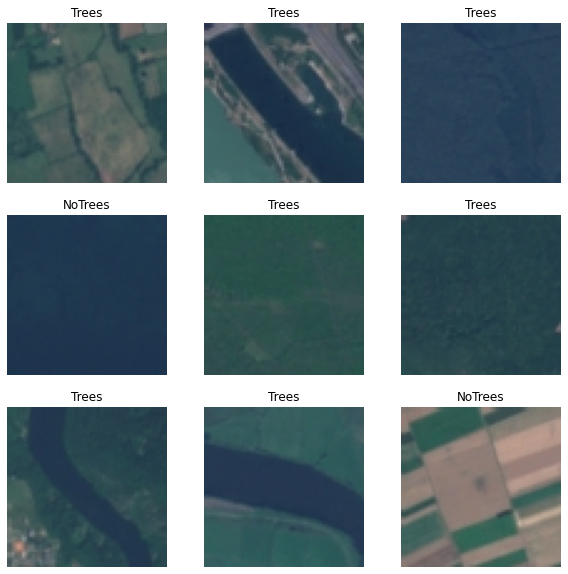

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 64, 64, 3)
(32,)


In [ ]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(num_classes, activation = 'softmax')
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 64, 64, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        1

In [ ]:
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
228/228 [==============================] - 12s 17ms/step - loss: 0.4584 - accuracy: 0.7839 - val_loss: 0.3850 - val_accuracy: 0.8420
Epoch 2/20
228/228 [==============================] - 4s 17ms/step - loss: 0.3172 - accuracy: 0.8802 - val_loss: 0.3545 - val_accuracy: 0.8455
Epoch 3/20
228/228 [==============================] - 4s 16ms/step - loss: 0.2588 - accuracy: 0.9001 - val_loss: 0.2620 - val_accuracy: 0.8920
Epoch 4/20
228/228 [==============================] - 5s 21ms/step - loss: 0.2234 - accuracy: 0.9136 - val_loss: 0.2197 - val_accuracy: 0.9071
Epoch 5/20
228/228 [==============================] - 4s 16ms/step - loss: 0.2036 - accuracy: 0.9206 - val_loss: 0.1732 - val_accuracy: 0.9295
Epoch 6/20
228/228 [==============================] - 4s 16ms/step - loss: 0.1724 - accuracy: 0.9341 - val_loss: 0.1721 - val_accuracy: 0.9333
Epoch 7/20
228/228 [==============================] - 4s 16ms/step - loss: 0.1752 - accuracy: 0.9304 - val_loss: 0.1695 - val_accuracy: 0.934

Text(0.5, 1.0, 'Training and Validation Accuracy')

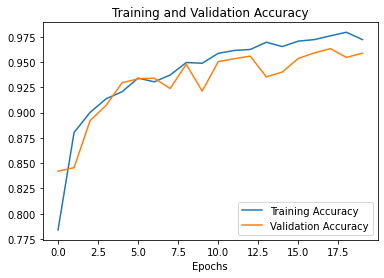

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs_range = range(epochs)


plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.xlabel("Epochs")
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

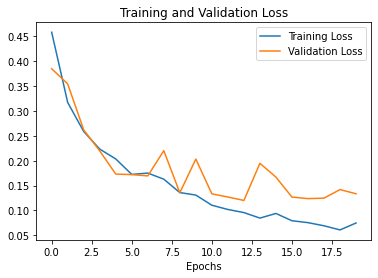

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']



plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.xlabel("Epochs")
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()